In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [2]:
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

In [2]:
#data = pd.read_csv('data.csv')

In [3]:
#data.shape

In [4]:
#data.head()

In [5]:
#create indexes: will start at zero until the number of columns

#for i, col in enumerate(data.columns):
#    print(i, col)

In [8]:
#Read the data
data = pd.read_csv('players_22.csv')

#Eliminate some data
data = data[data['overall']>69]

In [10]:
#Here we are going to place all the players in just four categories for a simpler analysis.

arquero = ['GK']
defensor = ['CB', 'LCB', 'RCB', 'LB' , 'RB']
mediocampista = ['CM', 'LDM', 'LAM', 'RDM', 'CDM', 'CAM', 'LM', 'RM']
atacante = ['ST', 'CF', 'LW', 'RW']

data['posicion'] = ''
for i, posicion_del_jugador in enumerate(data['player_positions']):
    for posicion in arquero:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 3.
    for posicion in defensor:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 0.
    for posicion in mediocampista:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 1.
    for posicion in atacante:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 2.   

In [11]:
nans = data.isna().sum().sort_values(ascending=False)
print(nans[nans!=0]/data.shape[0])

club_loaned_from             0.933394
goalkeeping_speed            0.903019
nation_team_id               0.887466
nation_logo_url              0.887466
nation_jersey_number         0.887466
nation_position              0.887466
player_tags                  0.835682
player_traits                0.210613
passing                      0.096981
defending                    0.096981
physic                       0.096981
dribbling                    0.096981
shooting                     0.096981
pace                         0.096981
release_clause_eur           0.072278
club_joined                  0.071729
value_eur                    0.005672
club_contract_valid_until    0.005124
club_position                0.005124
club_jersey_number           0.005124
club_name                    0.005124
league_level                 0.005124
league_name                  0.005124
club_team_id                 0.005124
wage_eur                     0.005124
club_logo_url                0.005124
club_flag_ur

In [12]:
drop_vars = nans[list(nans/data.shape[0] > 0.5)].keys()
for var in drop_vars:
    print(var)
    data.drop(var,inplace=True,axis=1)

club_loaned_from
goalkeeping_speed
nation_team_id
nation_logo_url
nation_jersey_number
nation_position
player_tags


In [13]:
data.fillna(data.mean(), inplace=True)

In [15]:
categorical_variables = ['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'player_positions',
 'dob',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk',
 'player_face_url',
 'club_logo_url',
 'club_flag_url',
 'nation_flag_url']


for val in data:
    if val in categorical_variables:
        data[val]=data[val].astype('object')
    else:
        pd.to_numeric(data[val], downcast="float")

ValueError: Unable to parse string "Finesse Shot, Long Shot Taker (AI), Playmaker (AI), Outside Foot Shot, One Club Player, Chip Shot (AI), Technical Dribbler (AI)" at position 0

In [16]:
X = data.loc[:,data.dtypes != 'object']

In [17]:
y = data['posicion']

In [18]:
X.columns

Index(['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'release_clause_eur', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
      

In [20]:
gkhabilities = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
x3 = data.loc[:,data.dtypes != 'object']

#x3 = x3.drop(gkhabilities, 1)

#x3 = x3.loc[x3['posicion'] != 'arquero']

In [26]:
dat2 = data.loc[data['posicion'] != 3.]
dat2 = dat2.drop(gkhabilities, 1)

dat2 = dat2.dropna(axis=0)

dat2 = dat2[dat2['overall'] >69]

X2 = dat2.loc[:,dat2.dtypes != 'object']
y2 = dat2['posicion']

In [27]:
dat2.shape

(4031, 99)

In [28]:
y2.shape

(4031,)

In [9]:
#Clasificadores usuales
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
#Evaluaciones usuales de los modelos
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [10]:
#x_train, x_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3)

y = ['posicion']
x = cols
x_train, x_test, y_train, y_test = train_test_split(dat2[x],dat2[y], test_size=0.3)

NameError: name 'cols' is not defined

In [25]:
data2 = pd.read_csv('players_22.csv')

arquero = ['GK']
defensor = ['CB', 'LCB', 'RCB', 'LB' , 'RB']
mediocampista = ['CM', 'LDM', 'LAM', 'RDM', 'CDM', 'CAM', 'LM', 'RM']
atacante = ['ST', 'CF', 'LW', 'RW']

data['posicion'] = ''
for i, posicion_del_jugador in enumerate(data['player_positions']):
    for posicion in arquero:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 'arquero'
    for posicion in defensor:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 'defensor'
    for posicion in mediocampista:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 'mediocampista'
    for posicion in atacante:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 'atacante'


cols = ['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'release_clause_eur', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle']


y = ['posicion']
x = cols
x_train, x_test, y_train, y_test = train_test_split(data2[x],data2[y], test_size=0.3)



KeyError: "None of [Index(['posicion'], dtype='object')] are in the [columns]"

MLA = [
    ###Ensemble Methods
    #ensemble.AdaBoostClassifier(),
    #ensemble.BaggingClassifier(),
    #ensemble.ExtraTreesClassifier(),
    #ensemble.GradientBoostingClassifier(),
    #ensemble.RandomForestClassifier(),

    ###GLM
    #linear_model.LogisticRegressionCV(),
    #linear_model.SGDClassifier(),
    
    ###Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    ###SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True, nu=0.1),
    svm.LinearSVC(),
    
    ###Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    ###Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    ###xgboost: 
    XGBClassifier()    
    ]
    
    #split dataset in cross-validation with this splitter class
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'Exactitud', 'Tasa de mala clasificacion' , 'Tiempo']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = y_train[y]
MLA_test = y_test[y]
#index through MLA and save performance to table
row_index = 1
for alg in MLA:

#set name and parameters
    MLA_name = alg.__class__.__name__
    
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    

    cv_results = model_selection.cross_validate(alg,x_train[x],  y_train[y], return_train_score=True, cv  = cv_split)
    

    MLA_compare.loc[row_index, 'Tiempo'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'Exactitud'] = round(cv_results['test_score'].mean(),2)   
    MLA_compare.loc[row_index, 'Tasa de mala clasificacion'] =round(1- cv_results['test_score'].mean(),2) 

    alg.fit(x_train[x],  y_train[y])
    MLA_predict[MLA_name] = alg.predict(x_train[x])
    MLA_test[MLA_name] = alg.predict(x_test[x])
    row_index+=1
    
    
MLA_compare.sort_values(by = ['Exactitud'], ascending = False, inplace = True)


In [44]:
MLA_compare

,MLA Name,Exactitud,Tasa de mala clasificacion,Tiempo
1,LogisticRegressionCV,0.35,0.65,0.908365
2,SGDClassifier,0.32,0.68,0.048171


# <ins>ESPACIO PUBLICITARIO<ins>

In [50]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.utils import shuffle

In [68]:
data = pd.read_csv('players_22.csv')

#data = shuffle(data)

#data = data[data['overall']>69]

data = data[:5500]

data.shape
data.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [69]:

arquero = ['GK']
defensor = ['CB', 'LCB', 'RCB', 'LB' , 'RB']
mediocampista = ['CM', 'LDM', 'LAM', 'RDM', 'CDM', 'CAM', 'LM', 'RM']
atacante = ['ST', 'CF', 'LW', 'RW']

data['posicion'] = ''
for i, posicion_del_jugador in enumerate(data['player_positions']):
    for posicion in arquero:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 3.
    for posicion in defensor:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 0.
    for posicion in mediocampista:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 1.
    for posicion in atacante:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 2.   

In [70]:
data.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,posicion
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,2
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png,2
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png,2
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png,2
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png,1


In [71]:
nans = data.isna().sum().sort_values(ascending=False)
print(nans[nans!=0]/data.shape[0])

club_loaned_from             0.933818
goalkeeping_speed            0.901818
nation_team_id               0.888182
nation_logo_url              0.888182
nation_jersey_number         0.888182
nation_position              0.888182
player_tags                  0.836364
player_traits                0.210727
passing                      0.098182
defending                    0.098182
physic                       0.098182
dribbling                    0.098182
shooting                     0.098182
pace                         0.098182
release_clause_eur           0.072182
club_joined                  0.071273
value_eur                    0.006000
club_contract_valid_until    0.005091
club_position                0.005091
club_jersey_number           0.005091
club_name                    0.005091
league_level                 0.005091
league_name                  0.005091
club_team_id                 0.005091
wage_eur                     0.005091
club_logo_url                0.005091
club_flag_ur

In [72]:
drop_vars = nans[list(nans/data.shape[0] > 0.5)].keys()
for var in drop_vars:
    print(var)
    data.drop(var,inplace=True,axis=1)

club_loaned_from
goalkeeping_speed
nation_team_id
nation_logo_url
nation_jersey_number
nation_position
player_tags


In [73]:
data.fillna(data.mean(), inplace=True)

In [74]:
cols = ['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'release_clause_eur', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle']


y = ['posicion']
x = cols
x_train, x_test, y_train, y_test = train_test_split(data[x],data[y], test_size=0.3)

In [62]:
MLA = [
    ###Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    #ensemble.ExtraTreesClassifier(),
    #ensemble.GradientBoostingClassifier(),
    #ensemble.RandomForestClassifier(),

    ###GLM
    #linear_model.LogisticRegressionCV(),
    #linear_model.SGDClassifier(),
    
    ###Nearest Neighbor
    #neighbors.KNeighborsClassifier(),
    
    ###SVM
    #svm.SVC(probability=True),
    #svm.NuSVC(probability=True, nu=0.1),
    #svm.LinearSVC(),
    
    ###Trees    
    #tree.DecisionTreeClassifier(),
    #tree.ExtraTreeClassifier(),
    
    ###Discriminant Analysis
    #discriminant_analysis.LinearDiscriminantAnalysis(),
    #discriminant_analysis.QuadraticDiscriminantAnalysis(),

    ###xgboost: 
    #XGBClassifier()    
    ]
    
    #split dataset in cross-validation with this splitter class
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'Exactitud', 'Tasa de mala clasificacion' , 'Tiempo']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = y_train[y]
MLA_test = y_test[y]
#index through MLA and save performance to table
row_index = 1
for alg in MLA:

#set name and parameters
    MLA_name = alg.__class__.__name__
    
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    

    #cv_results = model_selection.cross_validate(alg,x_train[x],  y_train[y], return_train_score=True, cv  = cv_split)
    cv_results = 

    MLA_compare.loc[row_index, 'Tiempo'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'Exactitud'] = round(cv_results['test_score'].mean(),2)   
    MLA_compare.loc[row_index, 'Tasa de mala clasificacion'] =round(1- cv_results['test_score'].mean(),2) 

    alg.fit(x_train[x],  y_train[y])
    MLA_predict[MLA_name] = alg.predict(x_train[x])
    MLA_test[MLA_name] = alg.predict(x_test[x])
    row_index+=1
    
    
MLA_compare.sort_values(by = ['Exactitud'], ascending = False, inplace = True)


In [63]:
MLA_compare

,MLA Name,Exactitud,Tasa de mala clasificacion,Tiempo
3,ExtraTreesClassifier,0.8,0.2,0.382038
4,GradientBoostingClassifier,0.8,0.2,4.8862
5,RandomForestClassifier,0.79,0.21,0.628146
2,BaggingClassifier,0.78,0.22,0.315699
1,AdaBoostClassifier,0.59,0.41,0.37111
6,LogisticRegressionCV,0.32,0.68,0.9508
7,SGDClassifier,0.26,0.74,0.0505332


In [75]:
MLA = [
    ###Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    ###GLM
    linear_model.LogisticRegressionCV(),
    linear_model.SGDClassifier(),
    
    ###Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    ###SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True, nu=0.1),
    svm.LinearSVC(),
    
    ###Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    ###Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    ###xgboost: 
    XGBClassifier()    
    ]
     
    
    #split dataset in cross-validation with this splitter class
#cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'Exactitud', 'Tasa de mala clasificacion']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = y_train[y]
MLA_test = y_test[y]
#index through MLA and save performance to table
row_index = 1
for alg in MLA:

#set name and parameters
    MLA_name = alg.__class__.__name__
    
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    

    #cv_results = model_selection.cross_validate(alg,x_train[x],  y_train[y], return_train_score=True, cv  = cv_split)
    
    alg.fit(x_train[x],  y_train[y])
    cv_results = alg.score(x_test[x], y_test[y])

    #MLA_compare.loc[row_index, 'Tiempo'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'Exactitud'] = round(cv_results, 2)   
    MLA_compare.loc[row_index, 'Tasa de mala clasificacion'] =round(1- cv_results, 2) 

    #alg.fit(x_train[x],  y_train[y])
    MLA_predict[MLA_name] = alg.predict(x_train[x])
    MLA_test[MLA_name] = alg.predict(x_test[x])
    row_index+=1
    
    
#MLA_compare.sort_values(by = ['Exactitud'], ascending = False, inplace = True)


In [76]:
MLA_compare.sort_values(by = ['Exactitud'], ascending = False, inplace = True)
MLA_compare

,MLA Name,Exactitud,Tasa de mala clasificacion
5,RandomForestClassifier,0.8,0.2
3,ExtraTreesClassifier,0.79,0.21
4,GradientBoostingClassifier,0.79,0.21
14,LinearDiscriminantAnalysis,0.79,0.21
16,XGBClassifier,0.79,0.21
2,BaggingClassifier,0.77,0.23
15,QuadraticDiscriminantAnalysis,0.77,0.23
12,DecisionTreeClassifier,0.72,0.28
13,ExtraTreeClassifier,0.72,0.28
1,AdaBoostClassifier,0.65,0.35


## Matriz de confusión

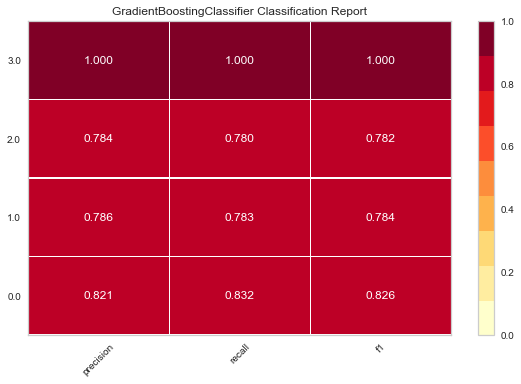

In [81]:
from yellowbrick.classifier import ClassificationReport

#model = LogisticRegression()


visualizer = ClassificationReport(ensemble.GradientBoostingClassifier())

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()


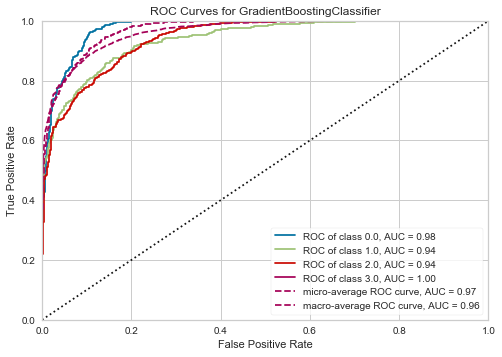

In [95]:
from yellowbrick.classifier import ROCAUC

classes=[0., 1., 2., 3.]



# Instantiate the visualizer with the classification model

#for lost in loss:
visualizer = ROCAUC(ensemble.GradientBoostingClassifier(), classes=classes)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data
    

## <ins>GradientBoostinClassifier<ins>

In [47]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )

cv_results = model_selection.cross_validate(ensemble.GradientBoostingClassifier() , x_train[x],  y_train[y], return_train_score=True, cv  = cv_split)

GBC_columns = ['MLA Name', 'Exactitud', 'Tasa de mala clasificacion' , 'Tiempo']
GBC_compare = pd.DataFrame(columns = GBC_columns)

GBC_name = ensemble.GradientBoostingClassifier().__class__.__name__
GBC_compare.loc[0,'MLA Name'] = GBC_name
GBC_compare.loc[0,'Tiempo'] = cv_results['fit_time'].mean()
GBC_compare.loc[0,'Exactitud'] = round(cv_results['test_score'].mean(),2)   
GBC_compare.loc[0,'Tasa de mala clasificacion'] =round(1- cv_results['test_score'].mean(),2)

In [48]:
GBC_compare

,MLA Name,Exactitud,Tasa de mala clasificacion,Tiempo
0,GradientBoostingClassifier,0.8,0.2,4.73335


### Hiperparametrización



Uso: <span style="color:blue">StratifiedKFold</span> y <span style="color:blue">RandomizedSearchCV</span>

* <span style="color:blue">RandomizedSearchCV</span>: The parameters of the estimator used to apply these methods are optimized by cross-validated search over parameter settings. In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

* <span style="color:blue">StratifiedKFold</span>: This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.Therefore, in classifications tasks with imbalanced class distributions, we should prefer StratifiedKFold over KFold. Es decir, si quiero aplicar shuffle tengo que usar SKF.


    * Generate test sets such that all contain the same distribution of classes, or as close as possible.

    * Be invariant to class label: relabelling y = ["Happy", "Sad"] to y = [1, 0] should not change the indices generated.

    * Preserve order dependencies in the dataset ordering, when shuffle=False: all samples from class k in some test set were contiguous in y, or separated in y by samples from classes other than k.

In [18]:
#cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )

#cv_results = model_selection.cross_validate(ensemble.GradientBoostingClassifier() , x_train[x],  y_train[y], return_train_score=True, cv  = cv_split)


Exactitud del clasificador Gradient Boost Classifier en la base de prueba: 0.81


In [19]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from datetime import datetime

In [30]:
params = {
        'min_samples_split':[180, 370],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [5,8]
        }

In [21]:
GBC =  ensemble.GradientBoostingClassifier(learning_rate=0.02, n_estimators=600,min_samples_leaf = 50, warm_start=True)

In [22]:
folds = 3
param_comb = 3

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(GBC, param_distributions=params, n_iter=param_comb, n_jobs=4, cv=skf.split(x_train,y_train), verbose=3, random_state=1001 )
random_search.fit(x_train,y_train)
random_search.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   6 out of   9 | elapsed:  2.2min remaining:  1.1min
[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed:  2.5min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001BCCDCA47C8>,
                   error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.02,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=50,
                                                    

In [23]:
print('\n Todos los resultados:')
print(random_search.cv_results_)
print('\n Mejor estimador:')
print(random_search.best_estimator_)
print('\n Mejor puntaje de gini normalizado para  %d-fold busqueda con %d combinaciones de los parametros:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Mejores hypermarametros:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


 Todos los resultados:
{'mean_fit_time': array([57.84931636, 77.8318189 , 46.56233891]), 'std_fit_time': array([0.03122852, 3.22559681, 3.52827252]), 'mean_score_time': array([0.10934925, 0.11590274, 0.11455592]), 'std_score_time': array([0.01275474, 0.00879039, 0.00736418]), 'param_subsample': masked_array(data=[0.8, 1.0, 0.6],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_split': masked_array(data=[180, 370, 180],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[5, 8, 8],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'subsample': 0.8, 'min_samples_split': 180, 'max_depth': 5}, {'subsample': 1.0, 'min_samples_split': 370, 'max_depth': 8}, {'subsample': 0.6, 'min_samples_split': 180, 'max_depth': 8}], 'split0_test_score': array([0.81882353, 0.81647059, 0.81960784]), 'split1_test_score': 

In [25]:
GBC3=ensemble.GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=50, min_samples_split=180,
                           min_weight_fraction_leaf=0.0, n_estimators=600,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)
GBC3.fit(x_train[x],  y_train[y])

y_pred = GBC3.predict(x_test)

print('Exactitud del clasificador Gradient Boost Classifier en la base de prueba: {:.2f}'.format(GBC3.score(x_test[x], y_test[y])))

Exactitud del clasificador Gradient Boost Classifier en la base de prueba: 0.81


In [31]:
params4 = {
        'min_samples_split':[180, 90, 30],
        'subsample': [0.6, 0.4, 0.2],
        'max_depth': [8, 10],
        'learning_rate': [0.01, 0.02, 0.015, 3],
        'n_estimators' : [600, 3000],
        'max_leaf_nodes' : [2, 5, 10, None],
        'warm_start' : [True, False],
        'min_samples_leaf' : [20, 50, 100]
        }

In [32]:
GBC4 =  ensemble.GradientBoostingClassifier()

In [33]:
folds = 3
param_comb = 3

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(GBC4, param_distributions=params4, n_iter=param_comb, n_jobs=4, cv=skf.split(x_train,y_train), verbose=3, random_state=1001 )
random_search.fit(x_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   6 out of   9 | elapsed:  3.0min remaining:  1.5min
[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed:  3.8min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001BCCDCF13C8>,
                   error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                      

In [34]:
print('\n Mejor estimador:')
print(random_search.best_estimator_)
print('\n Mejor puntaje de gini normalizado para  %d-fold busqueda con %d combinaciones de los parametros:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Mejores hypermarametros:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


 Mejor estimador:
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=20, min_samples_split=30,
                           min_weight_fraction_leaf=0.0, n_estimators=600,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

 Mejor puntaje de gini normalizado para  3-fold busqueda con 3 combinaciones de los parametros:
0.6115032679738561

 Mejores hypermarametros:
{'warm_start': False, 'subsample': 0.6, 'n_estimators': 600, 'min_samples_split': 30, 'min_samples_leaf': 20, 'max_leaf_nodes': None, 'max

In [49]:
GBC5 = ensemble.GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=20, min_samples_split=30,
                           min_weight_fraction_leaf=0.0, n_estimators=600,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


GBC5.fit(x_train[x],  y_train[y])


print('Exactitud del clasificador Gradient Boost Classifier en la base de prueba: {:.2f}'.format(GBC5.score(x_test[x], y_test[y])))

Exactitud del clasificador Gradient Boost Classifier en la base de prueba: 0.81


In [ ]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

MLA_columns = ['MLA Name', 'Exactitud', 'Tasa de mala clasificacion' , 'Tiempo']
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [78]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )

cv_results = model_selection.cross_validate(ensemble.GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=50, min_samples_split=180,
                           min_weight_fraction_leaf=0.0, n_estimators=600,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True) , x_train[x],  y_train[y], return_train_score=True, cv  = cv_split)

GBC_columns = ['MLA Name', 'Exactitud', 'Tasa de mala clasificacion' , 'Tiempo']
GBC_compare = pd.DataFrame(columns = GBC_columns)

GBC_name = ensemble.GradientBoostingClassifier().__class__.__name__
GBC_compare.loc[0,'MLA Name'] = GBC_name
GBC_compare.loc[0,'Tiempo'] = cv_results['fit_time'].mean()
GBC_compare.loc[0,'Exactitud'] = round(cv_results['test_score'].mean(),2)   
GBC_compare.loc[0,'Tasa de mala clasificacion'] =round(1- cv_results['test_score'].mean(),2)

In [79]:
GBC_compare

,MLA Name,Exactitud,Tasa de mala clasificacion,Tiempo
0,GradientBoostingClassifier,0.81,0.19,31.3824


In [80]:
alg = ensemble.GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=50, min_samples_split=180,
                           min_weight_fraction_leaf=0.0, n_estimators=600,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)

alg.fit(x_train[x],  y_train[y])
cv_results = alg.score(x_test[x], y_test[y])

cv_results

0.8

In [84]:
gridcvs = {}

inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

params = {
        'min_samples_split':[180, 370],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [5,8]
        }

name = ensemble.GradientBoostingClassifier.__class__.__name__

gcv = GridSearchCV(estimator=ensemble.GradientBoostingClassifier(),
                        param_grid=params,
                       scoring='accuracy',
                       n_jobs=-1,
                       cv=inner_cv,
                       verbose=0,
                       refit=True)
gridcvs[name]=gcv  
        
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

nested_score = cross_validate(gcv, 
                               X=x_train[x], 
                               y=y_train[y], 
                               cv=outer_cv,
                               return_estimator=True,
                               n_jobs=-1)
    
best= nested_score['estimator'][0].best_estimator_
print('Best parameters:' , best)
print('%s   | accuracy: %.2f%% |  standard deviation: %.2f, Time' % 
              (name, nested_score['test_score'].mean() * 100, nested_score['test_score'].std() * 100),nested_score['fit_time'].mean())

Best parameters: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=370,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
ABCMeta   | accuracy: 80.99% |  standard deviation: 1.71, Time 378.97469065189364
